In [1]:
import warnings
warnings.filterwarnings("ignore")

import env
import Liam_wrangle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train_zillow.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33448 entries, 0 to 33447
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parcelid             33448 non-null  int64  
 1   land_type            33448 non-null  float64
 2   has_heating_system   33448 non-null  int64  
 3   bathrooms            33448 non-null  float64
 4   bedrooms             33448 non-null  float64
 5   quality              33448 non-null  float64
 6   square_feet          33448 non-null  float64
 7   fips                 33448 non-null  float64
 8   has_fireplace        33448 non-null  float64
 9   full_bathrooms       33448 non-null  float64
 10  latitude             33448 non-null  float64
 11  longitude            33448 non-null  float64
 12  lot_square_feet      33448 non-null  float64
 13  has_pool             33448 non-null  float64
 14  city                 33448 non-null  float64
 15  county               33448 non-null 

In [4]:
train.room_count.value_counts()

0.0     25336
6.0      2246
7.0      1951
8.0      1475
5.0      1171
9.0       600
4.0       421
10.0      155
3.0        46
11.0       32
2.0         8
12.0        7
Name: room_count, dtype: int64

## What we want to cluster

land_type          
bathrooms           
bedrooms            
quality             
square_feet         
fips                
latitude            
longitude           
lot_square_feet    
city               
room_count          
structure_tax_value            
land_tax_value                 
house_age            
acres                   
square_feet_bins     
lot_sqft_bins
acre_bins

In [5]:
# quality, roomcount, house_age

In [6]:
X = train[['quality', 'house_age', 'room_count']]
X.head(3)

,quality,house_age,room_count
0,6.0,70.0,0.0
1,6.0,65.0,4.0
2,4.0,81.0,0.0


In [7]:
# Scale the X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [8]:
X_scaled.head()

,quality,house_age,room_count
0,-0.225719,0.684838,-0.549290
1,-0.225719,0.458142,0.811344
2,-1.708842,1.183571,-0.549290
3,-0.225719,-0.176609,-0.549290
4,1.257405,-1.174074,-0.549290


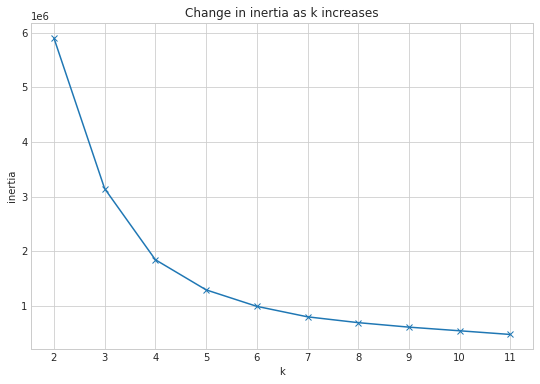

In [9]:
# lets plot inertia vs k
from sklearn.cluster import KMeans
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [10]:
import viz_kmeans

#define the thing
kmeans = KMeans(n_clusters=5)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([4, 1, 2, ..., 0, 1, 3], dtype=int32)

In [11]:
train['quality_houseage_roomcount_cluster'] = kmeans.predict(X_scaled)

train.head(20)

,parcelid,land_type,has_heating_system,bathrooms,bedrooms,quality,square_feet,fips,has_fireplace,full_bathrooms,...,in_orange_county,in_ventura,house_age,tax_rate,acres,level_of_log_error,square_feet_bins,lot_sqft_bins,acre_bins,quality_houseage_roomcount_cluster
0,12397645,261.0,1,2.0,3.0,6.0,1139.0,6037.0,0.0,2.0,...,0,0,70.0,77.088243,0.115886,Accurate,1k-1.5k,0-10k,0-15,4
1,13899643,261.0,0,1.0,2.0,6.0,882.0,6059.0,0.0,1.0,...,1,0,65.0,99.593289,0.094582,Accurate,500-1k,0-10k,0-15,1
2,10936804,261.0,1,1.0,2.0,4.0,943.0,6037.0,0.0,1.0,...,0,0,81.0,91.300853,0.163522,Accurate,500-1k,0-10k,0-15,2
3,12877473,261.0,1,3.0,5.0,6.0,1449.0,6037.0,0.0,3.0,...,0,0,51.0,77.842486,0.141919,Over,1k-1.5k,0-10k,0-15,0
4,11190920,261.0,1,2.0,4.0,8.0,1546.0,6037.0,0.0,2.0,...,0,0,29.0,51.992135,0.195294,Accurate,1.5l-2k,0-10k,0-15,3
5,12553557,266.0,1,1.0,1.0,6.0,605.0,6037.0,0.0,1.0,...,0,0,64.0,77.385006,0.344881,Accurate,500-1k,10k-20k,0-15,4
6,14178220,261.0,0,3.0,3.0,6.0,2270.0,6059.0,1.0,3.0,...,1,0,57.0,84.373945,0.165289,Accurate,2k-2.5k,0-10k,0-15,1
7,17051872,261.0,0,3.5,4.0,6.0,3010.0,6111.0,1.0,3.0,...,0,1,35.0,88.051898,2.630005,Accurate,3k-3.5k,70+,0-15,0
8,12265697,261.0,1,1.0,3.0,4.0,1326.0,6037.0,0.0,1.0,...,0,0,70.0,69.243449,0.115014,Over,1k-1.5k,0-10k,0-15,2
9,12101593,261.0,1,1.0,2.0,4.0,800.0,6037.0,0.0,1.0,...,0,0,71.0,54.479598,0.123577,Accurate,500-1k,0-10k,0-15,2


In [12]:
X_scaled['quality_houseage_roomcount_cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

,quality,house_age,room_count,quality_houseage_roomcount_cluster
0,-0.225719,0.684838,-0.549290,4
1,-0.225719,0.458142,0.811344,1
2,-1.708842,1.183571,-0.549290,2
3,-0.225719,-0.176609,-0.549290,0
4,1.257405,-1.174074,-0.549290,3


In [13]:
# Cluster Centers aka (centroids)
kmeans.cluster_centers_

array([[-0.00987876, -1.02848596, -0.54370838],
       [-0.22571873, -0.16360891,  1.73872014],
       [-1.60518157,  1.15253105, -0.54928951],
       [ 1.39046332, -0.56099176, -0.54928951],
       [-0.00902715,  0.80766937, -0.51021099]])

In [14]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,quality,house_age,room_count
0,-0.009879,-1.028486,-0.543708
1,-0.225719,-0.163609,1.738720
2,-1.605182,1.152531,-0.549290
3,1.390463,-0.560992,-0.549290
4,-0.009027,0.807669,-0.510211


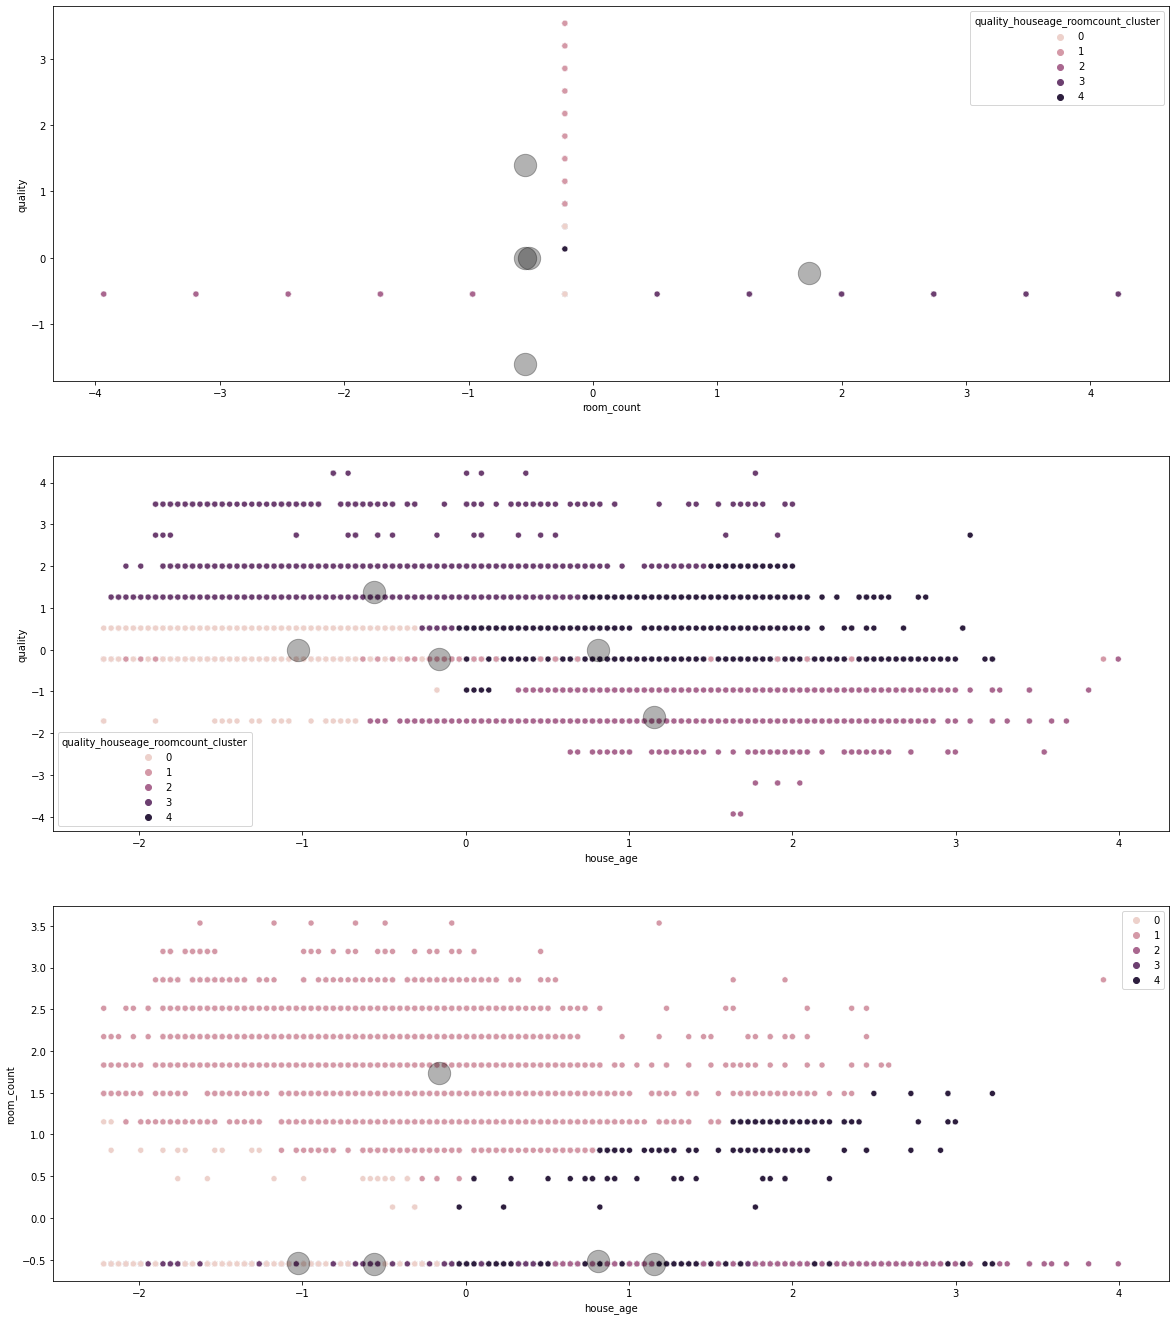

In [15]:
# lets visualize the clusters along with the centers on (scaled data).

plt.figure(figsize=(20, 40))

# scatter plot of data with hue for cluster
plt.subplot(5,1,1)
sns.scatterplot(x = 'quality', y= 'room_count', data = X_scaled, hue = 'quality_houseage_roomcount_cluster')
centroids_scaled.plot.scatter(x = 'room_count', y = 'quality', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)


plt.subplot(5,1,2)
sns.scatterplot(x = 'house_age', y= 'quality', data = X_scaled, hue = 'quality_houseage_roomcount_cluster')
centroids_scaled.plot.scatter(x = 'house_age', y = 'quality', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)


plt.subplot(5,1,3)
sns.scatterplot(x = 'house_age', y= 'room_count', data = X_scaled, hue = 'quality_houseage_roomcount_cluster')
centroids_scaled.plot.scatter(x = 'house_age', y = 'room_count', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)


plt.legend();

In [16]:
train.room_count.value_counts()

0.0     25336
6.0      2246
7.0      1951
8.0      1475
5.0      1171
9.0       600
4.0       421
10.0      155
3.0        46
11.0       32
2.0         8
12.0        7
Name: room_count, dtype: int64

<Figure size 1008x648 with 0 Axes>

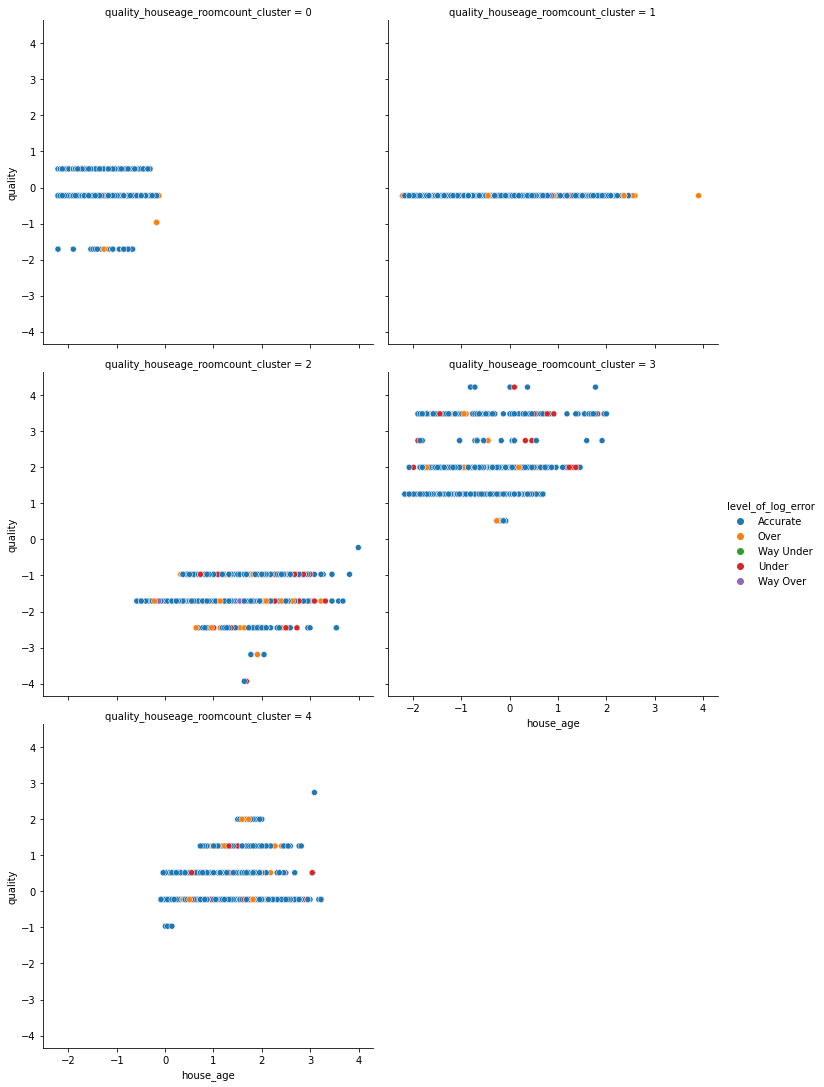

In [17]:
# lets visualize the clusters along with the centers on (scaled data).

plt.figure(figsize=(14, 9))

# scatter plot of data with hue for cluster

sns.relplot(x = 'house_age', y= 'quality', data = X_scaled, col = X_scaled.quality_houseage_roomcount_cluster, col_wrap = 2, hue = train.level_of_log_error)

# plot cluster centers (centroids)

# centroids_scaled.plot.scatter(x = 'age', y = 'annual_income', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

plt.show();

## Stat Tests

In [18]:
# With logerror target

In [19]:
from scipy import stats

In [20]:
observed = pd.crosstab(train.logerror, X_scaled.quality_houseage_roomcount_cluster)

In [21]:
observed

quality_houseage_roomcount_cluster,0,1,2,3,4
logerror,,,,,
-4.655420,1,0,0,0,0
-2.331727,0,0,0,1,0
-2.312395,0,1,0,0,0
-2.311473,0,1,0,0,0
-2.298627,0,1,0,0,0
...,...,...,...,...,...
2.523992,0,0,1,0,0
2.876386,0,0,0,1,0
2.957147,0,0,1,0,0


In [22]:
alpha = .05

In [23]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [24]:
chi2, p, degf

(133362.55811234724, 0.46972789177031593, 133324)

In [25]:
null_hypothesis = "logerror and has-heating_system are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We fail to reject the null hypothesis
0.46972789177031593


In [26]:
# With Level_of_log_error target 

In [27]:
observed = pd.crosstab(train.level_of_log_error, X_scaled.quality_houseage_roomcount_cluster)

In [28]:
observed

quality_houseage_roomcount_cluster,0,1,2,3,4
level_of_log_error,,,,,
Accurate,5439,7300,4645,7144,5857
Over,254,394,484,340,441
Under,111,162,283,183,288
Way Over,17,32,24,11,15
Way Under,3,6,8,2,5


In [29]:
alpha = .05

In [30]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [31]:
chi2, p, degf

(388.32825204831346, 1.014388801648264e-72, 16)

In [32]:
null_hypothesis = "logerror and quality_houseage_roomcount_cluster are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

We reject the null hypothesis
We reject the hypothesis that logerror and quality_houseage_roomcount_cluster are independent
1.014388801648264e-72


In [33]:
# Anova Test

In [34]:
# With logerror

In [35]:
null_hypo = 'There is no signficant difference between the log error means of each individual cluster.'
alt_hypo = 'There is a signficant difference between the log error means of at least one of the 3 clusters.'
alpha = 0.05
F, p = stats.f_oneway(train[X_scaled.quality_houseage_roomcount_cluster == 0].logerror,
                      train[X_scaled.quality_houseage_roomcount_cluster == 1].logerror,
                      train[X_scaled.quality_houseage_roomcount_cluster == 2].logerror,
                      train[X_scaled.quality_houseage_roomcount_cluster == 3].logerror)

In [36]:
if p < alpha:
    print('We reject the null hypothesis:\n',null_hypo, '\n')
    print('We continue forward with our alternative hypothesis:\n', alt_hypo,'\n')
else:
    print('We fail to reject the null hypothesis\n:', null_hypo,'\n')
    print('We stop here\n')
print('Anova Test Results on house_age and quality and roomcount Cluster')
print('Our F-value:\n',F)
print('Our P-value:\n',p)

We reject the null hypothesis:
 There is no signficant difference between the log error means of each individual cluster. 

We continue forward with our alternative hypothesis:
 There is a signficant difference between the log error means of at least one of the 3 clusters. 

Anova Test Results on house_age and quality and roomcount Cluster
Our F-value:
 4.095319906530568
Our P-value:
 0.006472867204673886


In [37]:
# With level_of_log_error ( can't. use due to string feature value)

In [38]:
# Use one sample t-test to test each cluster (mean of one  1 cluster aginst mean oof all the others)
# or two samople t-test

In [39]:
# bedroom, bathroom, city

In [40]:
X = train[['bedrooms', 'bathrooms', 'quality']]
X.head(3)

,bedrooms,bathrooms,quality
0,3.0,2.0,6.0
1,2.0,1.0,6.0
2,2.0,1.0,4.0


In [41]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

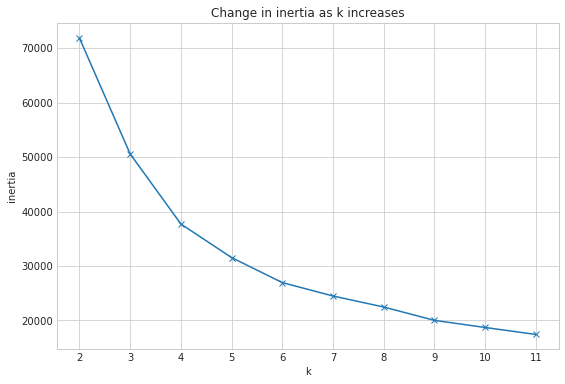

In [42]:
# lets plot inertia vs k
from sklearn.cluster import KMeans
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [43]:
#define the thing
kmeans = KMeans(n_clusters=5)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

array([2, 3, 0, ..., 2, 1, 4], dtype=int32)

In [44]:
train['bedrooms_bathrooms_quality_cluster'] = kmeans.predict(X_scaled)

train.head()

,parcelid,land_type,has_heating_system,bathrooms,bedrooms,quality,square_feet,fips,has_fireplace,full_bathrooms,...,in_ventura,house_age,tax_rate,acres,level_of_log_error,square_feet_bins,lot_sqft_bins,acre_bins,quality_houseage_roomcount_cluster,bedrooms_bathrooms_quality_cluster
0,12397645,261.0,1,2.0,3.0,6.0,1139.0,6037.0,0.0,2.0,...,0,70.0,77.088243,0.115886,Accurate,1k-1.5k,0-10k,0-15,4,2
1,13899643,261.0,0,1.0,2.0,6.0,882.0,6059.0,0.0,1.0,...,0,65.0,99.593289,0.094582,Accurate,500-1k,0-10k,0-15,1,3
2,10936804,261.0,1,1.0,2.0,4.0,943.0,6037.0,0.0,1.0,...,0,81.0,91.300853,0.163522,Accurate,500-1k,0-10k,0-15,2,0
3,12877473,261.0,1,3.0,5.0,6.0,1449.0,6037.0,0.0,3.0,...,0,51.0,77.842486,0.141919,Over,1k-1.5k,0-10k,0-15,0,1
4,11190920,261.0,1,2.0,4.0,8.0,1546.0,6037.0,0.0,2.0,...,0,29.0,51.992135,0.195294,Accurate,1.5l-2k,0-10k,0-15,3,4


In [45]:
X_scaled['bedrooms_bathrooms_quality_cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

,bedrooms,bathrooms,quality,bedrooms_bathrooms_quality_cluster
0,-0.023900,-0.200517,-0.225719,2
1,-1.046151,-1.430121,-0.225719,3
2,-1.046151,-1.430121,-1.708842,0
3,2.020603,1.029088,-0.225719,1
4,0.998352,-0.200517,1.257405,4


In [46]:
# Cluster Centers aka (centroids)
kmeans.cluster_centers_

array([[-5.60393119e-01, -1.19358093e+00, -1.62550015e+00],
       [ 1.33726418e+00,  1.41474853e+00,  4.68245463e-01],
       [ 2.91152492e-01, -6.98061004e-02, -2.61781955e-01],
       [-1.37242588e+00, -7.57612640e-01, -8.33961160e-05],
       [-3.06587270e-01,  3.33678876e-01,  1.28665166e+00]])

In [47]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

,bedrooms,bathrooms,quality
0,-0.560393,-1.193581,-1.625500
1,1.337264,1.414749,0.468245
2,0.291152,-0.069806,-0.261782
3,-1.372426,-0.757613,-0.000083
4,-0.306587,0.333679,1.286652


In [ ]:
# lets visualize the clusters along with the centers on (scaled data).

plt.figure(figsize=(10, 20))

# scatter plot of data with hue for cluster
plt.subplot(5,1,1)
sns.swarmplot(x = 'bedrooms', y= 'bathrooms', data = X_scaled, hue = X_scaled.bedrooms_bathrooms_quality_cluster, palette='viridis')



    # plt.subplot(5,1,2)
    # sns.swarmplot(x = 'bedrooms', y= 'quality', data = X_scaled, hue = X_scaled.bedrooms_bathrooms_quality_cluster, palette='viridis')
    # centroids_scaled.plot.scatter(x = 'bedrooms', y= 'quality', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)


    # plt.subplot(5,1,3)
    # sns.swarmplot(x = 'bathrooms', y= 'quality', data = X_scaled, hue = X_scaled.bedrooms_bathrooms_quality_cluster, palette='viridis')
    # centroids_scaled.plot.scatter(x = 'bathrooms', y= 'quality', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)


plt.legend();

## Stat Tests

In [ ]:
# With logerror target

In [ ]:
observed = pd.crosstab(train.logerror, X_scaled.bedrooms_bathrooms_quality_cluster)

In [ ]:
observed

In [ ]:
alpha = .05

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [ ]:
chi2, p, degf

In [ ]:
null_hypothesis = "logerror and bedrooms_bathrooms_quality_cluster are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

In [ ]:
# With level_of_log_error target

In [ ]:
observed = pd.crosstab(train.level_of_log_error, X_scaled.bedrooms_bathrooms_quality_cluster)

In [ ]:
observed

In [ ]:
alpha = .05

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [ ]:
chi2, p, degf

In [ ]:
null_hypothesis = "level_of_log_error and bedrooms_bathrooms_quality_cluster are independent"

if p < alpha:
    print("We reject the null hypothesis")
    print("We reject the hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

print(p)

In [ ]:
# Anova Test

In [ ]:
null_hypo = 'There is no signficant difference between the log error means of each individual cluster.'
alt_hypo = 'There is a signficant difference between the log error means of at least one of the 3 clusters.'
alpha = 0.05
F, p = stats.f_oneway(train[X_scaled.bedrooms_bathrooms_quality_cluster == 0].logerror,
                      train[X_scaled.bedrooms_bathrooms_quality_cluster  == 1].logerror,
                      train[X_scaled.bedrooms_bathrooms_quality_cluster  == 2].logerror,
                      train[X_scaled.bedrooms_bathrooms_quality_cluster  == 3].logerror,
                      train[X_scaled.bedrooms_bathrooms_quality_cluster  == 4].logerror)

In [ ]:
if p < alpha:
    print('We reject the null hypothesis:\n',null_hypo, '\n')
    print('We continue forward with our alternative hypothesis:\n', alt_hypo,'\n')
else:
    print('We fail to reject the null hypothesis\n:', null_hypo,'\n')
    print('We stop here\n')
print('Anova Test Results on house_age and quality and roomcount Cluster')
print('Our F-value:\n',F)
print('Our P-value:\n',p)

In [ ]:
X = train[['longitude', 'latitude', 'house_age']]
X.head(3)

In [ ]:
# Scale the X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns= X.columns).set_index([X.index.values])

In [ ]:
# lets plot inertia vs k
from sklearn.cluster import KMeans
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [ ]:
#define the thing
kmeans = KMeans(n_clusters=8)

# fit the thing
kmeans.fit(X_scaled)

# Use (predict using) the thing 
kmeans.predict(X_scaled)

In [ ]:
train['longitude_latitude_houseage_cluster'] = kmeans.predict(X_scaled)

train.head()

In [ ]:
X_scaled['longitude_latitude_houseage_cluster'] = kmeans.predict(X_scaled)

X_scaled.head()

In [ ]:
# Cluster Centers aka (centroids)
kmeans.cluster_centers_

In [ ]:
# Make a dataframe 
centroids_scaled = pd.DataFrame(kmeans.cluster_centers_, columns = X.columns)
centroids_scaled

In [ ]:
# lets visualize the clusters along with the centers on (scaled data).

plt.figure(figsize=(20, 20))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'longitude', y= 'latitude', data = X_scaled, hue = X_scaled.longitude_latitude_houseage_cluster, palette='viridis')
centroids_scaled.plot.scatter(x = 'longitude', y= 'latitude', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)



plt.legend();

In [ ]:
plt.figure(figsize=(20, 20))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'longitude', y= 'latitude', data = X_scaled, hue = X_scaled.house_age, palette='viridis')
centroids_scaled.plot.scatter(x = 'longitude', y= 'latitude', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

In [ ]:
plt.figure(figsize=(20, 20))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'longitude', y= 'latitude', data = X_scaled, hue = train.level_of_log_error, palette='viridis')
centroids_scaled.plot.scatter(x = 'longitude', y= 'latitude', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

In [ ]:
plt.figure(figsize=(20, 20))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'longitude', y= 'latitude', data = X_scaled, hue = train.quality, palette='viridis')
centroids_scaled.plot.scatter(x = 'longitude', y= 'latitude', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

In [ ]:
plt.figure(figsize=(20, 20))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'longitude', y= 'latitude', data = X_scaled, hue = train.land_type, palette='viridis')
centroids_scaled.plot.scatter(x = 'longitude', y= 'latitude', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

In [ ]:
plt.figure(figsize=(20, 20))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'longitude', y= 'latitude', data = X_scaled, hue = train.land_tax_value, palette='viridis')
centroids_scaled.plot.scatter(x = 'longitude', y= 'latitude', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

In [ ]:
plt.figure(figsize=(20, 20))

# scatter plot of data with hue for cluster
sns.scatterplot(x = 'longitude', y= 'latitude', data = X_scaled, hue = train.structure_tax_value, palette='viridis')
centroids_scaled.plot.scatter(x = 'longitude', y= 'latitude', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

In [ ]:
train.structure_tax_value.value_counts(ascending = False)

In [ ]:
train.land_tax_value.value_counts(ascending = False)

In [ ]:
train.land_tax_value.hist()

In [ ]:
plt.plot(x = train.land_tax_value, y = train.structure_tax_value , linestyle='-') 

In [ ]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x = 'longitude', y= 'house_age', data = X_scaled, hue = X_scaled.longitude_latitude_houseage_cluster, palette='viridis')
centroids_scaled.plot.scatter(x = 'longitude', y= 'house_age', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)

In [ ]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x = 'latitude', y= 'house_age', data = X_scaled, hue = X_scaled.longitude_latitude_houseage_cluster, palette='viridis')
centroids_scaled.plot.scatter(x = 'house_age', y= 'latitude', ax = plt.gca(), color = 'k', alpha = 0.3, s = 500, marker = 'o',)